In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#importing all required libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
df=pd.read_csv('Trained.csv',index_col='ID')
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D


In [ ]:
#data types of each column
df.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
#Need to check if there are any null values present in dataset
df.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
list=['Ever_Married','Graduated','Profession','Var_1']

for i in list:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))


In [ ]:
df.isna().sum()

Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1                0
Segmentation         0
dtype: int64

In [ ]:
#Insert the missing values with mean value
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy='mean')
list=['Work_Experience','Family_Size']

for i in list:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))



In [ ]:
df.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [ ]:
df.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
#select the columns with datatypes as object
df.select_dtypes(include='object').columns

Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1', 'Segmentation'],
      dtype='object')

In [ ]:
#the categorical data columns are converted into numerical values by using preprocessing technique as Label Encoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1', 'Segmentation']
for i in list:
    df[i]=le.fit_transform(df[i])



In [ ]:
#As checked now the categorical values are being transformed into numerical values
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
462809,1,0,22,0,5,1.000000,2,4.0,3,3
462643,0,1,38,1,2,2.641663,0,3.0,3,0
466315,0,1,67,1,2,1.000000,2,1.0,5,1
461735,1,1,67,1,7,0.000000,1,2.0,5,1
462669,0,1,40,1,3,2.641663,1,6.0,5,0
...,...,...,...,...,...,...,...,...,...,...
464018,1,0,22,0,0,0.000000,2,7.0,0,3
464685,1,0,35,0,4,3.000000,2,4.0,3,3
465406,0,0,33,1,5,1.000000,2,1.0,5,3


In [ ]:
#check skewness of the data
df.skew()

Gender            -0.190783
Ever_Married      -0.377985
Age                0.696021
Graduated         -0.518406
Profession         0.426630
Work_Experience    1.378963
Spending_Score    -0.759843
Family_Size        1.032458
Var_1             -1.207196
Segmentation      -0.078432
dtype: float64

Gender                Axes(0.125,0.653529;0.168478x0.226471)
Ever_Married       Axes(0.327174,0.653529;0.168478x0.226471)
Age                Axes(0.529348,0.653529;0.168478x0.226471)
Graduated          Axes(0.731522,0.653529;0.168478x0.226471)
Profession            Axes(0.125,0.381765;0.168478x0.226471)
Work_Experience    Axes(0.327174,0.381765;0.168478x0.226471)
Spending_Score     Axes(0.529348,0.381765;0.168478x0.226471)
Family_Size        Axes(0.731522,0.381765;0.168478x0.226471)
Var_1                     Axes(0.125,0.11;0.168478x0.226471)
Segmentation           Axes(0.327174,0.11;0.168478x0.226471)
dtype: object

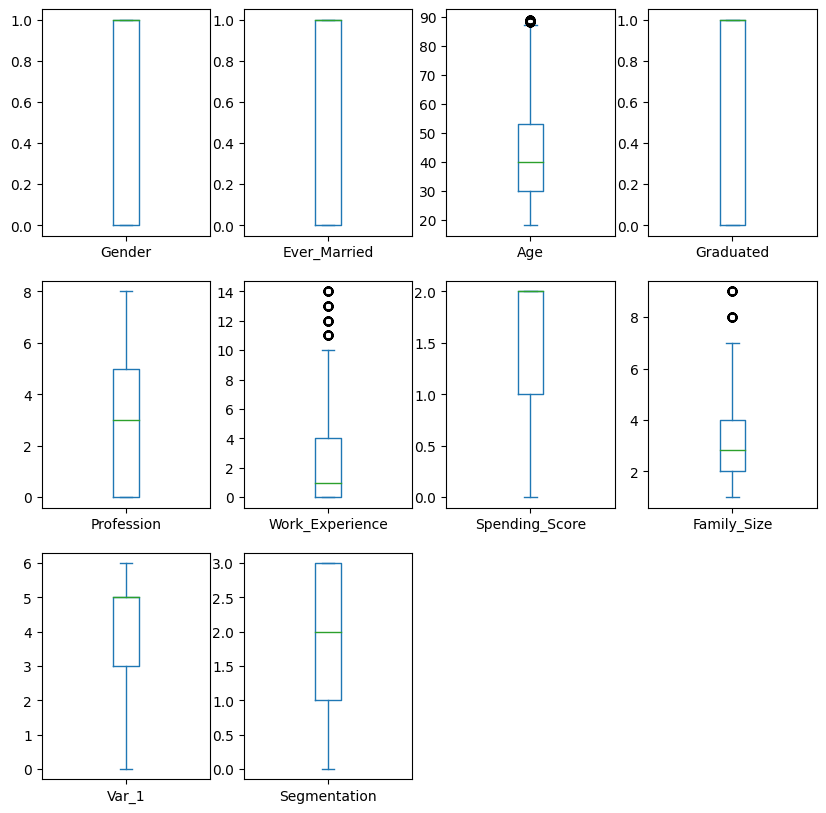

In [ ]:
#Check if the outliers are present in dataset using box plot

df.plot(kind='box',subplots=True,layout=(3,4),figsize=(10,10))

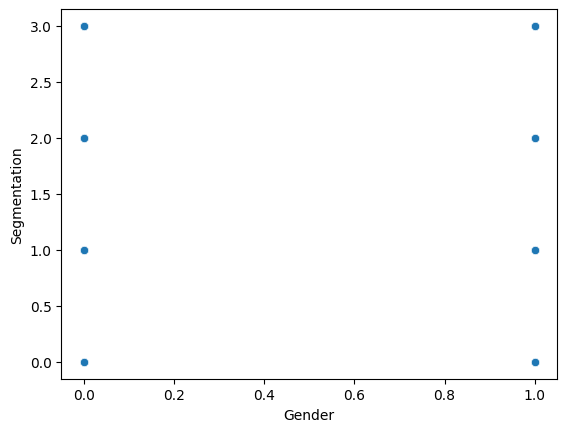

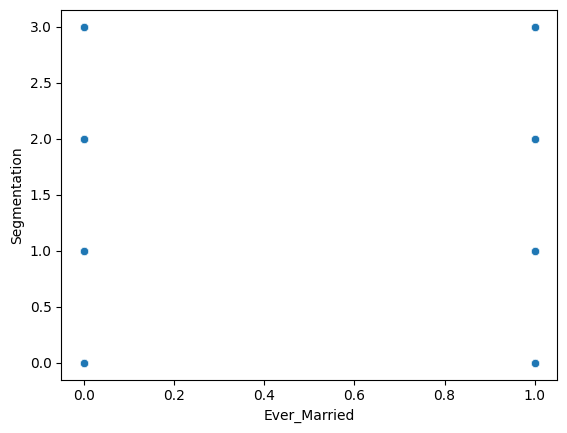

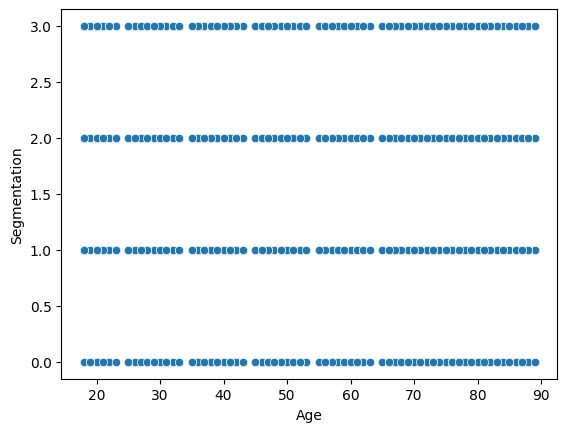

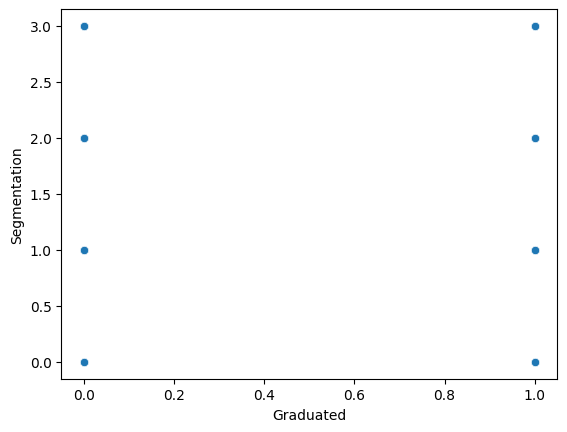

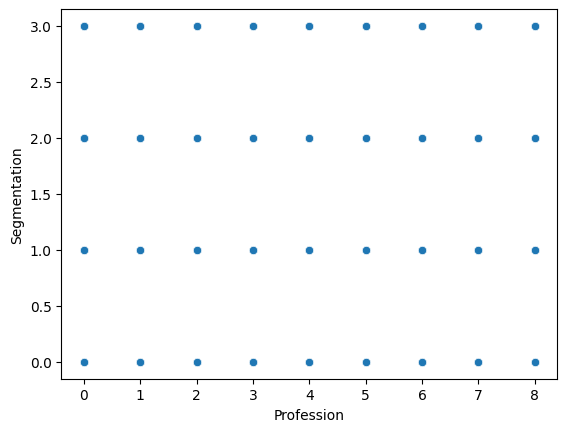

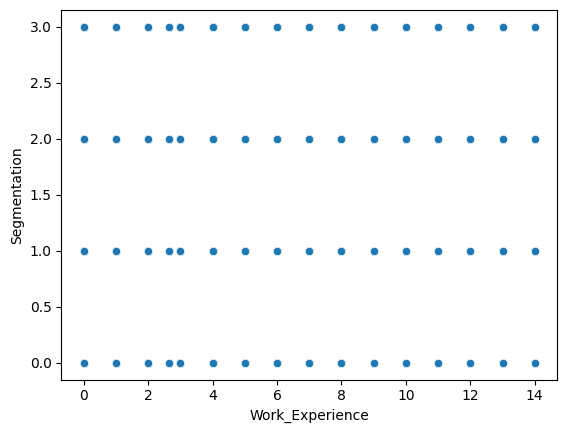

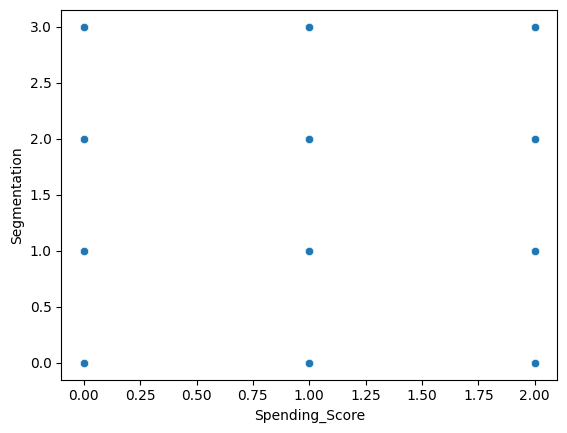

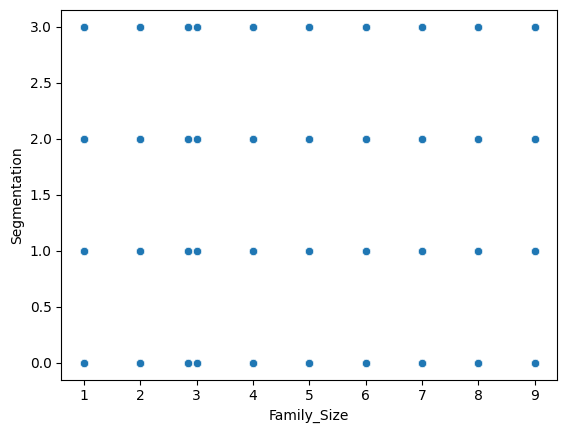

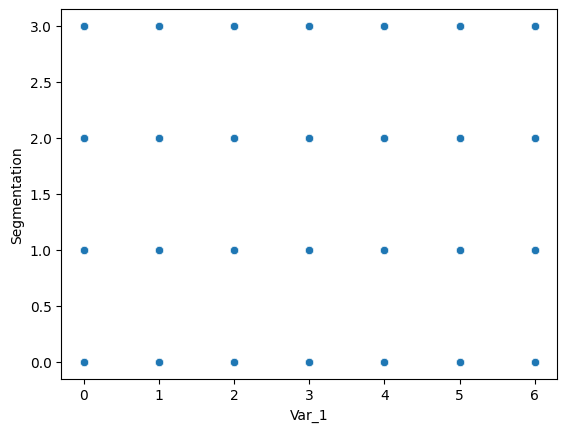

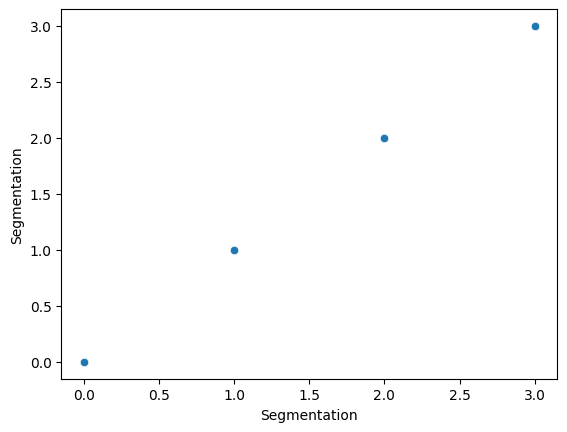

In [ ]:
for i in df.columns:
    plt.figure()
    sns.scatterplot(x=df[i],y='Segmentation',data=df)

In [ ]:
#Need to remove Outliers using zscore method
from scipy.stats import zscore
z=np.abs(zscore(df))
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
462809,1,0,22,0,5,1.000000,2,4.0,3,3
462643,0,1,38,1,2,2.641663,0,3.0,3,0
466315,0,1,67,1,2,1.000000,2,1.0,5,1
461735,1,1,67,1,7,0.000000,1,2.0,5,1
462669,0,1,40,1,3,2.641663,1,6.0,5,0
...,...,...,...,...,...,...,...,...,...,...
464018,1,0,22,0,0,0.000000,2,7.0,0,3
464685,1,0,35,0,4,3.000000,2,4.0,3,3
465406,0,0,33,1,5,1.000000,2,1.0,5,3


In [ ]:
threshold=3
print(np.where(z>3))

(array([  22,   26,   42,   55,  150,  202,  292,  321,  338,  344,  391,
        455,  517,  531,  628,  718,  831,  842,  857,  869,  940,  992,
       1034, 1226, 1232, 1232, 1264, 1297, 1403, 1447, 1509, 1546, 1549,
       1603, 1695, 1729, 1902, 1942, 2025, 2059, 2193, 2226, 2258, 2259,
       2267, 2296, 2313, 2388, 2401, 2421, 2431, 2466, 2511, 2568, 2609,
       2647, 2710, 2716, 2722, 2729, 2792, 2794, 2822, 2837, 2965, 3035,
       3044, 3055, 3131, 3177, 3178, 3235, 3243, 3264, 3298, 3361, 3502,
       3506, 3604, 3606, 3705, 3714, 3757, 3763, 3765, 3767, 3879, 3895,
       3902, 3910, 3958, 3979, 4225, 4249, 4312, 4424, 4447, 4465, 4480,
       4602, 4630, 4633, 4685, 4698, 4773, 4784, 4811, 4869, 4948, 4956,
       4961, 4978, 5078, 5096, 5280, 5313, 5368, 5395, 5412, 5418, 5492,
       5530, 5531, 5558, 5581, 5680, 5684, 5728, 5762, 5825, 5992, 5994,
       6003, 6039, 6061, 6098, 6101, 6158, 6237, 6271, 6303, 6333, 6351,
       6370, 6392, 6518, 6555, 6603, 6624, 6627, 6

In [ ]:
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
462809,1,0,22,0,5,1.000000,2,4.0,3,3
462643,0,1,38,1,2,2.641663,0,3.0,3,0
466315,0,1,67,1,2,1.000000,2,1.0,5,1
461735,1,1,67,1,7,0.000000,1,2.0,5,1
462669,0,1,40,1,3,2.641663,1,6.0,5,0
...,...,...,...,...,...,...,...,...,...,...
464018,1,0,22,0,0,0.000000,2,7.0,0,3
464685,1,0,35,0,4,3.000000,2,4.0,3,3
465406,0,0,33,1,5,1.000000,2,1.0,5,3


<Axes: >

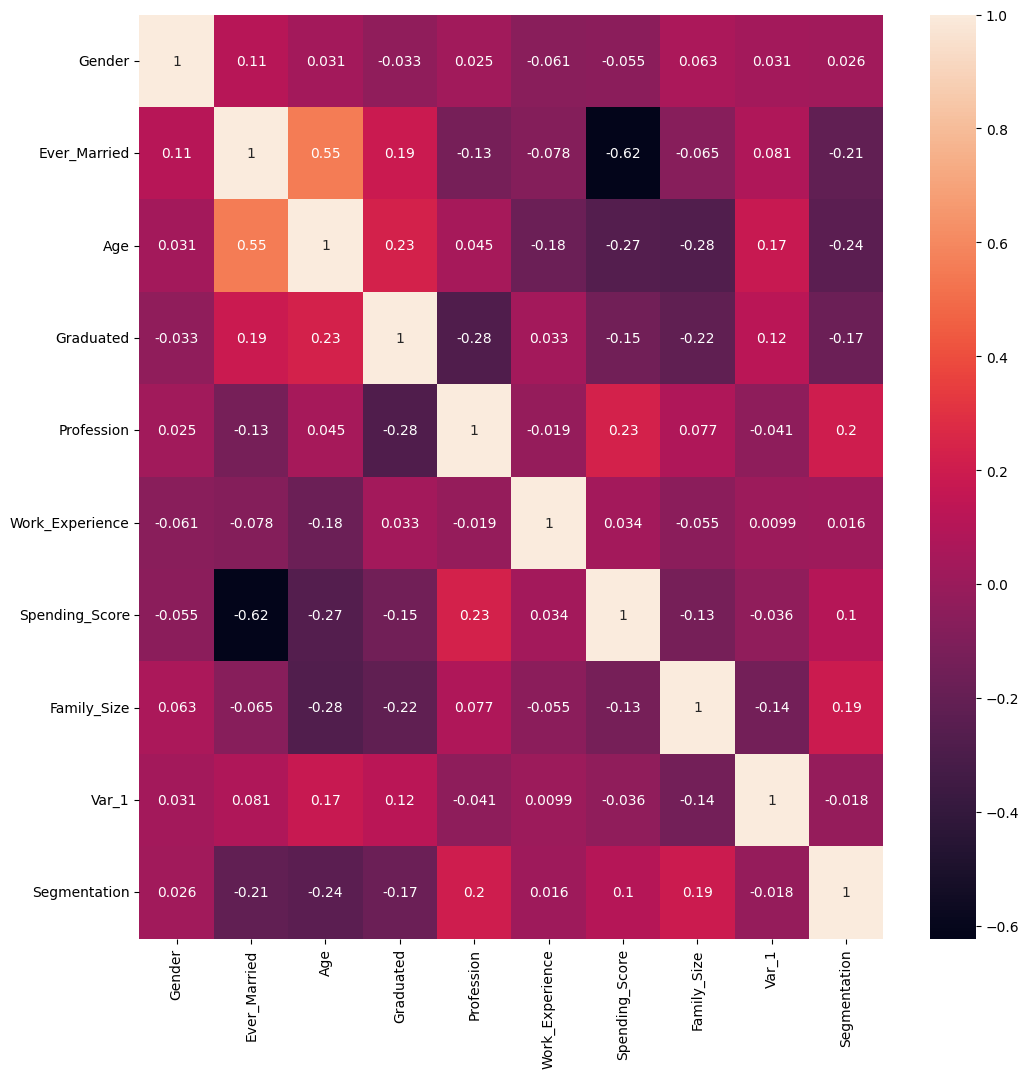

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df_new.corr(),annot=True)

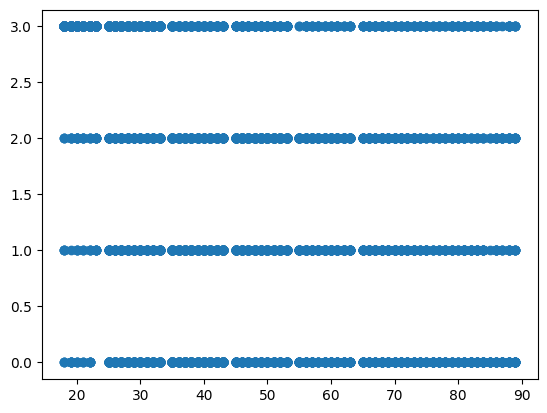

In [ ]:
plt.scatter('Age','Segmentation',data=df_new)

In [ ]:
x=df_new.iloc[:,0:-1]

In [ ]:
y=df_new.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
x_train.shape

(6308, 9)

In [ ]:
x_test.shape

(1577, 9)

In [ ]:
y_train.shape

(6308,)

In [ ]:
y_test.shape

(1577,)

In [ ]:
mnb=MultinomialNB()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier(criterion='gini')
dtcr=DecisionTreeClassifier(criterion='entropy')

model=[mnb,knn,dtc,dtcr]

for i in model:
    i.fit(x_train,y_train)
    print("Score: ",i,i.score(x_train,y_train))
    mpred=i.predict(x_test)
    print('Accuracy_score: ',accuracy_score(y_test,mpred))
    print("Confusion_matrix: ",confusion_matrix(y_test,mpred))

    print('Classification Report: \n',classification_report(y_test,mpred))
    print('\n')


Score:  MultinomialNB() 0.4575142675967026
Accuracy_score:  0.44831959416613826
Confusion_matrix:  [[ 83  82  92  95]
 [ 72  65 196  56]
 [ 42  69 239  55]
 [ 48  35  28 320]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.34      0.24      0.28       352
           1       0.26      0.17      0.20       389
           2       0.43      0.59      0.50       405
           3       0.61      0.74      0.67       431

    accuracy                           0.45      1577
   macro avg       0.41      0.43      0.41      1577
weighted avg       0.42      0.45      0.42      1577



Score:  KNeighborsClassifier() 0.6326886493341788
Accuracy_score:  0.45529486366518707
Confusion_matrix:  [[153  90  46  63]
 [109 127 120  33]
 [ 72 102 191  40]
 [113  42  29 247]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.34      0.43      0.38       352
           1       0.35      0.33      0.34  

In [ ]:
kernel=['rbf','poly','linear']

for i in kernel:
    svc=SVC(kernel=i)
    svc.fit(x_train,y_train)
    print(i,svc.score(x_train,y_train))
    svcpred=svc.predict(x_test)
    print("Accuracy_score: ",accuracy_score(y_test,svcpred))
    print("Confusion_matrix: ",confusion_matrix(y_test,svcpred))
    print("Classification_report: ",classification_report(y_test,svcpred))



rbf 0.48462270133164237
Accuracy_score:  0.4679771718452758
Confusion_matrix:  [[169  41  69  73]
 [121  49 177  42]
 [ 97  39 225  44]
 [ 89  27  20 295]]
Classification_report:                precision    recall  f1-score   support

           0       0.36      0.48      0.41       352
           1       0.31      0.13      0.18       389
           2       0.46      0.56      0.50       405
           3       0.65      0.68      0.67       431

    accuracy                           0.47      1577
   macro avg       0.44      0.46      0.44      1577
weighted avg       0.45      0.47      0.45      1577

poly 0.4766962587190869
Accuracy_score:  0.46670894102726695
Confusion_matrix:  [[129  37  41 145]
 [136  33 134  86]
 [ 76  45 211  73]
 [ 43  17   8 363]]
Classification_report:                precision    recall  f1-score   support

           0       0.34      0.37      0.35       352
           1       0.25      0.08      0.13       389
           2       0.54      0.52      0.

In [ ]:
#RandomForestClassifier Applied
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=110,random_state=40)
rf.fit(x_train,y_train)
print('RF score: ',rf.score(x_train,y_train))
rfpred=rf.predict(x_test)
print('Accuracy_score: ',accuracy_score(y_test,rfpred))
print('Confusion_matrix: ',confusion_matrix(y_test,rfpred))
print('Classification report: ',classification_report(y_test,rfpred))

RF score:  0.9633798351299937
Accuracy_score:  0.501585288522511
Confusion_matrix:  [[145  77  44  86]
 [ 94 143 114  38]
 [ 58  95 211  41]
 [ 80  32  27 292]]
Classification report:                precision    recall  f1-score   support

           0       0.38      0.41      0.40       352
           1       0.41      0.37      0.39       389
           2       0.53      0.52      0.53       405
           3       0.64      0.68      0.66       431

    accuracy                           0.50      1577
   macro avg       0.49      0.49      0.49      1577
weighted avg       0.50      0.50      0.50      1577



In [ ]:
#Extra Tress Classifier model applied
from sklearn.ensemble import ExtraTreesClassifier
et=ExtraTreesClassifier(n_estimators=100,random_state=42)
et.fit(x_train,y_train)
print('Extra trees score: ',et.score(x_train,y_train))
etpred=et.predict(x_test)
print('Accuracy_score: ',accuracy_score(y_test,etpred))
print('Confusion_matrix: ',confusion_matrix(y_test,etpred))
print('Classification_report: ',classification_report(y_test,etpred))

Extra trees score:  0.9633798351299937
Accuracy_score:  0.4838300570703868
Confusion_matrix:  [[149  70  50  83]
 [ 91 137 116  45]
 [ 62 107 199  37]
 [ 87  34  32 278]]
Classification_report:                precision    recall  f1-score   support

           0       0.38      0.42      0.40       352
           1       0.39      0.35      0.37       389
           2       0.50      0.49      0.50       405
           3       0.63      0.65      0.64       431

    accuracy                           0.48      1577
   macro avg       0.48      0.48      0.48      1577
weighted avg       0.48      0.48      0.48      1577



In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Ada Boost Classifier model applied
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,learning_rate=1.0,algorithm='SAMME.R')

ad.fit(x_train,y_train)
print('ADA score : ',ad.score(x_train,y_train))
adpred=ad.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,adpred))
print('Confusion_matrix',confusion_matrix(y_test,adpred))
print('Classification_report',classification_report(y_test,adpred))

ADA score :  0.9633798351299937
Accuracy_score 0.41915028535193405
Confusion_matrix [[124  89  61  78]
 [ 95 131 115  48]
 [ 79 120 165  41]
 [101  49  40 241]]
Classification_report               precision    recall  f1-score   support

           0       0.31      0.35      0.33       352
           1       0.34      0.34      0.34       389
           2       0.43      0.41      0.42       405
           3       0.59      0.56      0.57       431

    accuracy                           0.42      1577
   macro avg       0.42      0.41      0.42      1577
weighted avg       0.43      0.42      0.42      1577



In [ ]:
from sklearn.ensemble import VotingClassifier

estimators=[]
estimators.append(('svc',SVC(gamma='auto',probability=True)))
estimators.append(('dtc',DecisionTreeClassifier()))
estimators.append(('knn',KNeighborsClassifier()))
estimators.append(('RF',RandomForestClassifier()))



In [ ]:
estimators

[('svc', SVC(gamma='auto', probability=True)),
 ('dtc', DecisionTreeClassifier()),
 ('knn', KNeighborsClassifier())]

In [ ]:
vot_hard=VotingClassifier(estimators,voting='hard')
vot_hard.fit(x_train,y_train)
print(vot_hard.score(x_train,y_train))
predh=vot_hard.predict(x_test)
score=accuracy_score(y_test,predh)
print("Hard voting score %d",score)
print(predh)

0.7598287888395688
Hard voting score %d 0.4749524413443247
[0 2 2 ... 0 3 1]


In [ ]:
vot_soft=VotingClassifier(estimators=estimators,voting='soft')
vot_soft.fit(x_train,y_train)
print(vot_soft.score(x_train,y_train))
preds=vot_soft.predict(x_test)
score=accuracy_score(y_test,preds)
print('soft voting score %d',score)
print(preds)

0.9548192771084337
soft voting score %d 0.4540266328471782
[0 2 2 ... 0 3 1]


In [ ]:
#Applying Gridsearchcv

from sklearn.model_selection import GridSearchCV

svc=SVC()

parameter={'kernel':['rbf','poly','linear'],'C':[1,10]}

model=svc

grid=GridSearchCV(estimator=model,param_grid=parameter)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.kernel)
print(grid.best_params_)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['rbf', 'poly', 'linear']})
0.4967660114140774
rbf
{'C': 10, 'kernel': 'rbf'}


In [ ]:
from sklearn.model_selection import GridSearchCV

dtc=DecisionTreeClassifier()

parameter={'criterion':['gini','entropy']}

model=dtc

grid=GridSearchCV(estimator=model,param_grid=parameter)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_params_)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})
0.42878883956880154
gini
{'criterion': 'gini'}


In [ ]:
#applying Randomized search CV to check the best kernel to be applied in SVC
from sklearn.model_selection import RandomizedSearchCV
svc=SVC()

parameter={'kernel':['rbf','poly','linear'],'C':[1,10]}

model=svc

random=RandomizedSearchCV(estimator=model,param_distributions=parameter)

random.fit(x,y)
print(random.best_score_)
print(random.best_estimator_.kernel)
print(random.best_params_)

0.4967660114140774
rbf
{'kernel': 'rbf', 'C': 10}


In [ ]:
#applying Randomized search CV to check the best criterion to be applied in Decision Tree Classifier
from sklearn.model_selection import RandomizedSearchCV
dtc=DecisionTreeClassifier()

criterion_value={'criterion':['gini','entropy']}
model=dtc

random=RandomizedSearchCV(estimator=model,param_distributions=criterion_value)
random.fit(x,y)
print(random.best_score_)
print(random.best_estimator_.criterion)
print(random.best_params_)

0.43157894736842106
gini
{'criterion': 'gini'}
